# Exercise 3: Decision Tree vs XGBoost on MNIST Dataset

In [1]:
# Import libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Specify Paths for easy dataloading
BASE_PATH = './data/mnist/'
TRAIN_PATH = BASE_PATH + 'train.csv'
TEST_PATH = BASE_PATH + 'test.csv'

In [2]:
# The general metric for MNIST is a simple accuracy score.
from sklearn.metrics import accuracy_score

def calculate_accuracy(y_true : np.ndarray, y_pred : np.ndarray) -> float:
    """
        Calculates the accuracy score between labels and predictions.
        
        :param y_true: The true labels of the data
        :param y_pred: The predictions for the data
        
        :return: a floating point number denoting the accuracy
    """
    return round(accuracy_score(y_true, y_pred) * 100, 2)

## Dataset Information

The MNIST database is the largest database of handwritten digits and is used in most of the Image Classification algorithms.

MNIST consists of two subsets: the training set has a total of 60k different examples of handwritten digits from 0 to 9, the test dataset has 10k different examples. All have been labeled. The figure below is an example of some images extracted from MNIST.

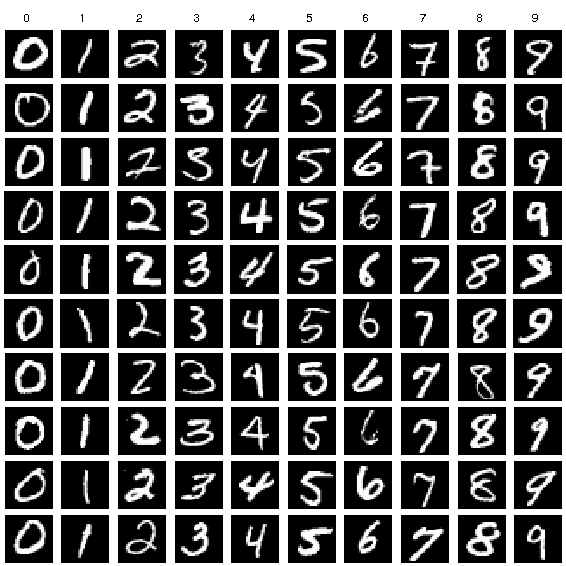

Each photo is a black and white image (with 1 channel), measuring 28x28 pixels (784 pixels in total). Each pixel has a value that is a natural number between 0 and 255. Black pixels have a value of 0, white pixels have a higher value (but no more than 255). Here is an example of the digit 7 and its pixel values. (For the sake of displaying the pixel matrix on the right, I have resized the photo to 14x14)

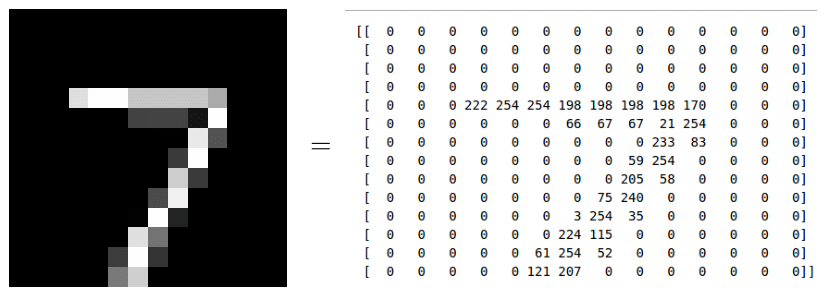

In [3]:
# Load in training data
train_df = pd.read_csv(TRAIN_PATH)
print(train_df.shape)

(42000, 785)


In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Load test raw dataset and label them with `sample_submission.csv` file
test_df = pd.read_csv(TEST_PATH)
print(train_df.shape)

(42000, 785)


In [38]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis (EDA)

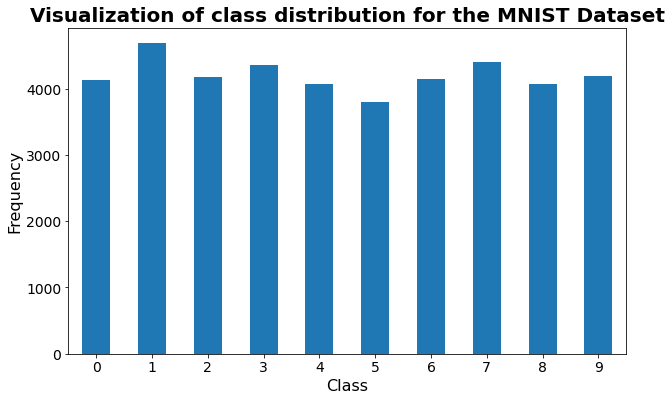

In [8]:
# Visualize target distribution
train_df['label'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Visualization of class distribution for the MNIST Dataset', fontsize=20, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Class', fontsize=16)
plt.ylabel('Frequency', fontsize=16);

## Splitting the Train dataset into Train and Validation Sets

#### Standardise features (pixel values) using StandardScaler with mean 0 and var 1.0

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
sc = StandardScaler()

In [11]:
X_std = sc.fit_transform(train_df.values[:, 1:])
y = train_df.values[:, 0]

print (X_std.shape, y.shape)

(42000, 784) (42000,)


In [39]:
X_test_std = sc.fit_transform(test_df.values[:, 1:])

print (X_test_std.shape)

(28000, 783)


#### Split the train set into train and validation set using train_test_split

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X_std, y, test_size=0.1, random_state = 42)

print (X_train.shape, y_train.shape)
print (X_valid.shape, y_valid.shape)

(37800, 784) (37800,)
(4200, 784) (4200,)


## Build Decision Tree Model 

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [15]:
# Train decision tree model
dtc = DecisionTreeClassifier(max_depth=10, random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [16]:
# Evaluate the decision tree model
train_preds_decision_tree = dtc.predict(X_train)
val_preds_decision_tree = dtc.predict(X_valid)

acc_decision_tree_train = calculate_accuracy(train_preds_decision_tree, y_train)
acc_decision_tree_val = calculate_accuracy(val_preds_decision_tree, y_valid)

print(f'Training accuracy for decision tree: {acc_decision_tree_train}%')
print(f'Validation accuracy for decision tree: {acc_decision_tree_val}%')

Training accuracy for decision tree: 90.53%
Validation accuracy for decision tree: 84.45%


## Build XGBoost Model 

In [17]:
import xgboost as xgb

<strong>XGBoost</strong> (eXtreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. 
XGBoost has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. 
XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. 
It also includes a variety of regularization which reduces overfitting and improves overall performance.

<strong>Regularization:</strong>

* Standard GBM implementation has no regularisation like XGBoost. Thus XGBoost also helps to reduce overfitting.

<strong>Parallel Processing:</strong>

* XGBoost implements parallel processing and is faster than GBM .
* XGBoost also supports implementation on Hadoop.

<strong>High Flexibility:</strong> XGBoost allows users to define custom optimization objectives and evaluation criteria adding a whole new dimension to the model.

<strong>Handling Missing Values:</strong> XGBoost has an in-built routine to handle missing values.

<strong>Tree Pruning:</strong> XGBoost makes splits up to the max_depth specified and then starts pruning the tree backwards and removes splits beyond which there is no positive gain.

<strong>Built-in Cross-Validation:</strong> XGBoost allows a user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.



<strong>Parameters</strong>

<strong>nthread</strong>

* This is used for parallel processing and the number of cores in the system should be entered..
* If you wish to run on all cores, do not input this value. The algorithm will detect it automatically.

<strong>eta</strong>

* Analogous to learning rate in GBM. Makes the model more robust by shrinking the weights on each step.

<strong>min_child_weight</strong>

* Defines the minimum sum of weights of all observations required in a child.
* Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.

<strong>max_depth</strong>

* It is used to define the maximum depth.
* Higher depth will allow the model to learn relations very specific to a particular sample.

<strong>max_leaf_nodes</strong>

* The maximum number of terminal nodes or leaves in a tree.
* Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
* If this is defined, GBM will ignore max_depth.

<strong>gamma</strong>

* A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
* Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.

<strong>subsample</strong>

* Same as the subsample of GBM. Denotes the fraction of observations to be randomly sampled for each tree.
* Lower values make the algorithm more conservative and prevent overfitting but values that are too small might lead to under-fitting.

<strong>colsample_bytree</strong>

* It is similar to max_features in GBM.
* Denotes the fraction of columns to be randomly sampled for each tree.

In [18]:
# Define parameters list of XGBoost
param_list = [("eta", 0.08), ("max_depth", 6), ("subsample", 0.8), ("colsample_bytree", 0.8), ("objective", "multi:softmax"), ("eval_metric", "merror"), ("alpha", 8), ("lambda", 2), ("num_class", 10)]
n_rounds = 600
early_stopping = 50


d_train = xgb.DMatrix(X_train, label=y_train)
d_val = xgb.DMatrix(X_valid, label=y_valid)

eval_list = [(d_train, "train"), (d_val, "validation")]

bst = xgb.train(param_list, d_train, n_rounds, evals=eval_list, early_stopping_rounds=early_stopping, verbose_eval=True)

[0]	train-merror:0.13823	validation-merror:0.15690
[1]	train-merror:0.11212	validation-merror:0.12548
[2]	train-merror:0.09746	validation-merror:0.11214
[3]	train-merror:0.08907	validation-merror:0.10500
[4]	train-merror:0.08415	validation-merror:0.10119
[5]	train-merror:0.08048	validation-merror:0.09833
[6]	train-merror:0.07815	validation-merror:0.09476
[7]	train-merror:0.07627	validation-merror:0.09333
[8]	train-merror:0.07429	validation-merror:0.09190
[9]	train-merror:0.07214	validation-merror:0.09000
[10]	train-merror:0.07042	validation-merror:0.08619
[11]	train-merror:0.06937	validation-merror:0.08619
[12]	train-merror:0.06741	validation-merror:0.08548
[13]	train-merror:0.06614	validation-merror:0.08286
[14]	train-merror:0.06452	validation-merror:0.08190
[15]	train-merror:0.06347	validation-merror:0.08095
[16]	train-merror:0.06177	validation-merror:0.08000
[17]	train-merror:0.06061	validation-merror:0.07952
[18]	train-merror:0.05997	validation-merror:0.07833
[19]	train-merror:0.05

[157]	train-merror:0.01037	validation-merror:0.03762
[158]	train-merror:0.01026	validation-merror:0.03786
[159]	train-merror:0.01011	validation-merror:0.03762
[160]	train-merror:0.00992	validation-merror:0.03786
[161]	train-merror:0.00976	validation-merror:0.03786
[162]	train-merror:0.00968	validation-merror:0.03786
[163]	train-merror:0.00958	validation-merror:0.03786
[164]	train-merror:0.00939	validation-merror:0.03786
[165]	train-merror:0.00937	validation-merror:0.03738
[166]	train-merror:0.00929	validation-merror:0.03690
[167]	train-merror:0.00915	validation-merror:0.03690
[168]	train-merror:0.00915	validation-merror:0.03738
[169]	train-merror:0.00910	validation-merror:0.03667
[170]	train-merror:0.00894	validation-merror:0.03690
[171]	train-merror:0.00892	validation-merror:0.03643
[172]	train-merror:0.00878	validation-merror:0.03643
[173]	train-merror:0.00865	validation-merror:0.03667
[174]	train-merror:0.00860	validation-merror:0.03643
[175]	train-merror:0.00847	validation-merror:0

In [19]:
# Evaluate the xgboost model
d_train = xgb.DMatrix(data=X_train)
d_valid = xgb.DMatrix(data=X_valid)

train_preds_xgb = bst.predict(d_train)
val_preds_xgb = bst.predict(d_valid)

acc_xgb_train = calculate_accuracy(train_preds_xgb, y_train)
acc_xgb_val = calculate_accuracy(val_preds_xgb, y_valid)

print(f'Training accuracy for XGBoost: {acc_xgb_train}%')
print(f'Validation accuracy for XGBoost: {acc_xgb_val}%')

Training accuracy for XGBoost: 99.59%
Validation accuracy for XGBoost: 96.86%


## Make predictions and save submission file for Test set

In [42]:
# Predict test set
d_test = xgb.DMatrix(data=X_test_std)
predictions = bst.predict(d_test)

# Creat new dataframe and save to .csv file
sample_sub['Label'] = predictions
sample_sub.to_csv('submission.csv', index=False)

___________________

## Submit time (～￣▽￣)～

<strong> Please submit your submission file at:  https://www.kaggle.com/competitions/digit-recognizer/submit </strong>

After successful submission, you can see your model's accuracy score on the test set

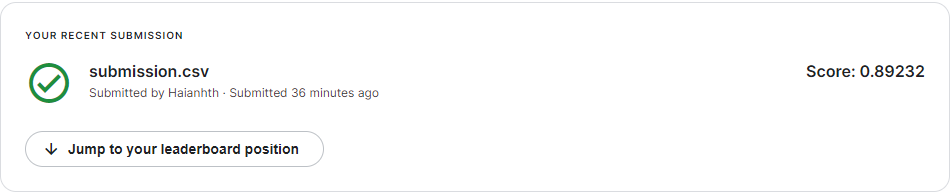

As you can see, my score is 0.89232. Quite bad (ノへ￣、)

________________________

# Home Work

<strong> Use any Ensemble learning techniques: Stacking, Bagging, Boosting, ... training your new model, predict test set, export to submission file and submit it to the Kaggle competition. Target the score up to 0.95. </strong>

___________________